In [25]:
import os
import sys
import pdb
import math
import random
import argparse
import numpy as np
import matplotlib
import matplotlib.path as mpath
import matplotlib.pyplot as plt
from common_performance_stats import collect_txt_files, filter_txt_files, parse_data, ade_fde
from driving_performance_safety import find_collision_rate, find_near_miss_rate, find_ttc
from driving_performance_comfort import find_acceleration_and_jerk
from driving_performance_efficiency import efficiency_time_traveled, average_speed, path_tracking_error, distance_traveled
import pandas as pd

In [3]:
%load_ext autoreload
%autoreload 2

##### Round 1. Priliminary learn the outputs and inspect some

In [15]:
#example_file = '/home/phong/driving_data/official/same_computation/lstmdefault_1Hz/result/joint_pomdp_drive_mode/beijing/pomdp_search_log-0_0_pid-56_r-3712717.txt'
example_file = '/home/phong/driving_data/official/same_computation/ca_100to200nodes/ca0_75hz/result/joint_pomdp_drive_mode/magic/pomdp_search_log-0_0_pid-58_r-8224701.txt'

In [16]:
action_list, ego_list, ego_path_list, exos_list, coll_bool_list, \
    pred_car_list, pred_exo_list, trial_list, depth_list, expanded_nodes, total_nodes = parse_data(example_file)

done


In [5]:
#action_list[0] # dictionary[timestep] = {steer: float, acceleration: float, speed: float}

In [6]:
#ego_list[0] # dictionary[timestep] = {pos: [x,y], heading: float, speed: float, vel: [vek_x, vel_y], bb: [bb_x, bby]}

In [7]:
#ego_path_list[0] # dictionary[timestep] = List[[x, y], []]

In [8]:
#exos_list[2] # dictionary[timestep] = List[{'id': int, 'pos': [x,y], 'heading': float, 'speed': float, 'vel': [vel_x, vel_y], }, 
            #{'id': int, 'pos': [x,y], 'heading': float, 'speed': float, 'vel': [vel_x, vel_y], }, ...]
            # Each time step is a list of exo cars with their info

In [9]:
#exos_list[2]

In [10]:
#pred_car_list # dictionary[timestep] = List[{'pos': [x,y], 'heading': float, 'bb': [bb_x, bb_y]}],
                # List length is 30 as it predicts 30 steps ahead for each timestep

In [11]:
#pred_exo_list[2] # dictionary[timestep] = ListLength30[[{'pos': [x,y], 'heading': float, 'bb': [bb_x, bb_y]}],
    #[{'pos': [x,y], 'heading': float, 'bb': [bb_x, bb_y]}], ...]
    # At each timestep, we have a list of 30 lists, each list is a list of exo cars with their dictionary info
    # We refer to exo_list to know which exo car is which

In [17]:
collision_rate = find_collision_rate(ego_list, exos_list)
print(f"Collision rate: {collision_rate}")

Collision rate: 0.0


In [18]:
near_miss_rate = find_near_miss_rate(ego_list, exos_list)
print(f"Near Miss rate: {near_miss_rate}")

Near Miss rate: 0.09090909090909091


In [19]:
true_min_ttc, mean_min_ttc = find_ttc(ego_list, exos_list)
print(f"True ttc: {true_min_ttc} mean ttc {mean_min_ttc}")

True ttc: 0.1 mean ttc 0.8363636363636363


In [20]:
jerk, lateral_acceleration = find_acceleration_and_jerk(ego_list)

In [21]:
print(f"Mean of jerk: {np.mean(jerk)} and std of lateral acceleration: {np.std(lateral_acceleration)}")
# good is below 5m/s^3 and 0.5

Mean of jerk: 7.060388724915646 and std of lateral acceleration: 0.0


In [14]:
avg_speed = average_speed(ego_list)
tracking_error = path_tracking_error(ego_list, ego_path_list)
efficiency_time = efficiency_time_traveled(ego_list, ego_path_list)
print(f"Avg speed: {avg_speed} Tracking error: {tracking_error} Efficiency time: {efficiency_time}")

Actual time: 150.67077251031367, Expected time: 117.89999999999999
Avg speed: 1.230026894038016 Tracking error: 0.3595713478247226 Efficiency time: 1.277953965312245


In [16]:
ego_list[0]

{'pos': [2614.9, 174.28],
 'heading': -0.018008,
 'speed': -5.0507e-10,
 'vel': (-5.049881081268401e-10, 9.094808985068978e-12),
 'bb': (1.9741, 3.8025)}

In [15]:
pred_car_list[0]

[{'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 174.28], 'heading': -0.018008, 'bb': (10.0, 10.0)},
 {'pos': [2614.9, 17

In [18]:
exos_list[2]

[{'id': 121,
  'pos': [2599.0, 164.72],
  'heading': 0.35055,
  'vel': [0.19447, 0.019168],
  'bb': (1.36632, 2.9504)},
 {'id': 83,
  'pos': [2576.3, 144.47],
  'heading': 0.88058,
  'vel': [2.1609, 2.5589],
  'bb': (2.381, 4.1774)}]

In [27]:
for z in enumerate(exos_list[2]):
    print(z)

(0, {'id': 121, 'pos': [2599.0, 164.72], 'heading': 0.35055, 'vel': [0.19447, 0.019168], 'bb': (1.36632, 2.9504)})
(1, {'id': 83, 'pos': [2576.3, 144.47], 'heading': 0.88058, 'vel': [2.1609, 2.5589], 'bb': (2.381, 4.1774)})


In [20]:
pred_exo_list[2]

[[{'pos': [2599.0, 164.8], 'heading': 0.35055, 'bb': (1.36632, 2.9504)},
  {'pos': [2576.2, 144.52], 'heading': 0.88058, 'bb': (2.381, 4.1774)}],
 [{'pos': [2598.9, 164.78], 'heading': 0.35055, 'bb': (1.36632, 2.9504)},
  {'pos': [2576.1, 144.55], 'heading': 0.88058, 'bb': (2.381, 4.1774)}],
 [{'pos': [2598.9, 164.7], 'heading': 0.35055, 'bb': (1.36632, 2.9504)},
  {'pos': [2576.1, 144.6], 'heading': 0.88058, 'bb': (2.381, 4.1774)}],
 [{'pos': [2598.9, 164.62], 'heading': 0.35055, 'bb': (1.36632, 2.9504)},
  {'pos': [2576.0, 144.62], 'heading': 0.88058, 'bb': (2.381, 4.1774)}],
 [{'pos': [2598.9, 164.57], 'heading': 0.35055, 'bb': (1.36632, 2.9504)},
  {'pos': [2575.9, 144.65], 'heading': 0.88058, 'bb': (2.381, 4.1774)}],
 [{'pos': [2599.0, 164.55], 'heading': 0.35055, 'bb': (1.36632, 2.9504)},
  {'pos': [2575.8, 144.67], 'heading': 0.88058, 'bb': (2.381, 4.1774)}],
 [{'pos': [2599.1, 164.56], 'heading': 0.35055, 'bb': (1.36632, 2.9504)},
  {'pos': [2575.7, 144.67], 'heading': 0.88058,

In [22]:
ade_fde(pred_car_list, pred_exo_list, ego_list, exos_list)

/home/phong/anaconda3/envs/temp/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/phong/anaconda3/envs/temp/lib/python3.9/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(nan, nan, 1.3196360991558762, 2.1329722797231767)

Round 2. Official way to plot

In [27]:

def get_prediction_and_driving_performance(ABSOLUTE_DIR):
    #ABSOLUTE_DIR = '/home/phong/driving_data/official/same_computation/lstmdefault_1Hz/'

    prediction_performance = {
        'ade': [],
        'fde': [],
    }
    driving_performance = {
        'safety': {
            'collision_rate': [],
            'near_miss_rate': [],
            'mean_min_ttc': [],
        },
        'comfort': {
            'jerk': [],
            'lateral_acceleration': [],
        },
        'efficiency': {
            'avg_speed': [],
            'tracking_error': [],
            'efficiency_time': [],
            'distance_traveled': [],
        },
    }
    tree_performance = {
        'expanded_nodes': [],
        'total_nodes': [],
        'trial': [],
        'depth': [],
    }

    for root, subdirs, files in os.walk(ABSOLUTE_DIR):
        if len(files) > 0:
            for file in files:
                if file.endswith('.txt'):
                    file_path = os.path.join(root, file)
                    print(f"Processing {file_path}")
                    action_list, ego_list, ego_path_list, exos_list, coll_bool_list, \
                        pred_car_list, pred_exo_list, trial_list, depth_list, expanded_nodes, total_nodes = parse_data(file_path)

                    # The number of steps are too small which can affect ADE/FDE, thus we ignore these files
                    if len(ego_list) <= 20:
                        continue

                    # Tree performance
                    tree_performance['expanded_nodes'].append(list(expanded_nodes.values()))
                    tree_performance['total_nodes'].append(list(total_nodes.values()))
                    tree_performance['trial'].append(list(trial_list.values()))
                    tree_performance['depth'].append(list(depth_list.values()))

                    # Prediction performance
                    ego_ade, ego_fde, exo_ade, exo_fde = ade_fde(pred_car_list, pred_exo_list, ego_list, exos_list)
                    prediction_performance['ade'].append(exo_ade)
                    prediction_performance['fde'].append(exo_fde)

                    # Driving performance - safety
                    collision_rate = find_collision_rate(ego_list, exos_list)
                    near_miss_rate = find_near_miss_rate(ego_list, exos_list)
                    true_min_ttc, mean_min_ttc = find_ttc(ego_list, exos_list)
                    driving_performance['safety']['collision_rate'].append(collision_rate)
                    driving_performance['safety']['near_miss_rate'].append(near_miss_rate)
                    driving_performance['safety']['mean_min_ttc'].append(mean_min_ttc)

                    # Driving performance - comfort
                    jerk, lateral_acceleration = find_acceleration_and_jerk(ego_list)
                    driving_performance['comfort']['jerk'].append(jerk)
                    driving_performance['comfort']['lateral_acceleration'].append(lateral_acceleration)

                    # Driving performance - efficiency
                    avg_speed = average_speed(ego_list)
                    tracking_error = path_tracking_error(ego_list, ego_path_list)
                    efficiency_time = efficiency_time_traveled(ego_list, ego_path_list)
                    distance_travel = distance_traveled(ego_list)
                    driving_performance['efficiency']['avg_speed'].append(avg_speed)
                    driving_performance['efficiency']['tracking_error'].append(tracking_error)
                    driving_performance['efficiency']['efficiency_time'].append(efficiency_time)
                    driving_performance['efficiency']['distance_traveled'].append(distance_travel)

    return prediction_performance, driving_performance, tree_performance


# Getting data for same_computation, Need to specify manually the directory
directories_map = {
    'ca': '/home/phong/driving_data/official/same_computation/ca_100to200nodes/',
    'cv': '/home/phong/driving_data/official/same_computation/cv_100to200nodes/',
    'hivt': '/home/phong/driving_data/official/same_computation/hivt_100to200nodes/',
    'lanegcn': '/home/phong/driving_data/official/same_computation/lanegcn_100to200nodes/',
    'lstmdefault': '/home/phong/driving_data/official/same_computation/lstmdefault_1Hz/',
    'lstmsocial': '/home/phong/driving_data/official/same_computation/lstmsocial_05Hz/',

}

prediction_performance_map = {}
driving_performance_map = {}
tree_performance_map = {}
# Loop through all directories and get the prediction and driving performance
for key, value in directories_map.items():
    print(f"Processing {key}")
    prediction_performance, driving_performance, tree_performance = get_prediction_and_driving_performance(value)
    prediction_performance_map[key] = prediction_performance
    driving_performance_map[key] = driving_performance
    tree_performance_map[key] = tree_performance
    

Processing ca
Processing /home/phong/driving_data/official/same_computation/ca_100to200nodes/ca0_75hz/result/joint_pomdp_drive_mode/magic/pomdp_search_log-0_0_pid-57_r-3027475.txt
done
Processing /home/phong/driving_data/official/same_computation/ca_100to200nodes/ca0_75hz/result/joint_pomdp_drive_mode/magic/pomdp_search_log-0_0_pid-58_r-1883624.txt
done
Processing /home/phong/driving_data/official/same_computation/ca_100to200nodes/ca0_75hz/result/joint_pomdp_drive_mode/magic/pomdp_search_log-0_0_pid-58_r-8224701.txt
done
Processing /home/phong/driving_data/official/same_computation/ca_100to200nodes/ca0_75hz/result/joint_pomdp_drive_mode/magic/pomdp_search_log-0_0_pid-57_r-9316925.txt
done
Processing /home/phong/driving_data/official/same_computation/ca_100to200nodes/ca0_75hz/result/joint_pomdp_drive_mode/magic/pomdp_search_log-0_0_pid-57_r-6979387.txt
done
Processing /home/phong/driving_data/official/same_computation/ca_100to200nodes/ca0_75hz/result/joint_pomdp_drive_mode/magic/pomdp_s

In [ ]:
import pickle

# Save the dictionary to a file
def save_dict_to_file(dictionary, file_name):
    with open(file_name, 'wb') as f:
        pickle.dump(dictionary, f)

# Load the dictionary from a file
def load_dict_from_file(file_name):
    with open(file_name, 'rb') as f:
        return pickle.load(f)

# Save the dictionary to a file
save_dict_to_file(prediction_performance_map, 'prediction_performance_map.pickle')
save_dict_to_file(driving_performance_map, 'driving_performance_map.pickle')
save_dict_to_file(tree_performance_map, 'tree_performance_map.pickle')

# Load the dictionary from the file
#loaded_dict = load_dict_from_file('my_dict.pickle')

In [11]:
def scatter_plot_one_pred_multi_metrics(prediction_performance, driving_performance):  
    # Combine the data into a single DataFrame
    data = {'ADE': prediction_performance['ade']}

    for category, metrics in driving_performance.items():
        for metric, values in metrics.items():
            data[metric] = values

    df = pd.DataFrame(data)

    # Plot the scatter plot matrix
    fig, axes = plt.subplots(3, 4, figsize=(12, 15), sharex=True)

    # Comfort
    axes[0, 0].scatter(df['ADE'], df['jerk'])
    axes[0, 0].set_title('Jerk')

    axes[0, 1].scatter(df['ADE'], df['lateral_acceleration'])
    axes[0, 1].set_title('Lateral Acceleration')

    axes[0, 2].axis('off')
    axes[0, 3].axis('off')

    # Safety
    axes[1, 0].scatter(df['ADE'], df['collision_rate'])
    axes[1, 0].set_title('Collision Rate')

    axes[1, 1].scatter(df['ADE'], df['near_miss_rate'])
    axes[1, 1].set_title('Near Miss Rate')

    axes[1, 2].scatter(df['ADE'], df['mean_min_ttc'])
    axes[1, 2].set_title('Mean Min TTC')

    axes[1, 3].axis('off')


    # Efficiency
    axes[2, 0].scatter(df['ADE'], df['avg_speed'])
    axes[2, 0].set_title('Avg Speed')

    axes[2, 1].scatter(df['ADE'], df['tracking_error'])
    axes[2, 1].set_title('Tracking Error')

    axes[2, 2].scatter(df['ADE'], df['efficiency_time'])
    axes[2, 2].set_title('Efficiency Time')

    axes[2, 3].scatter(df['ADE'], df['distance_traveled'])
    axes[2, 3].set_title('Distance Travelled')

    # Set the x-axis label for all plots
    for ax in axes.flatten():
        ax.set_xlabel('ADE')

    # Add text annotations for each row
    plt.gcf().text(0.02, 0.82, 'Comfort', fontsize=14, fontweight='bold', va='center', rotation='vertical')
    plt.gcf().text(0.02, 0.52, 'Safety', fontsize=14, fontweight='bold', va='center', rotation='vertical')
    plt.gcf().text(0.02, 0.22, 'Efficiency', fontsize=14, fontweight='bold', va='center', rotation='vertical')


    plt.tight_layout()
    plt.show()

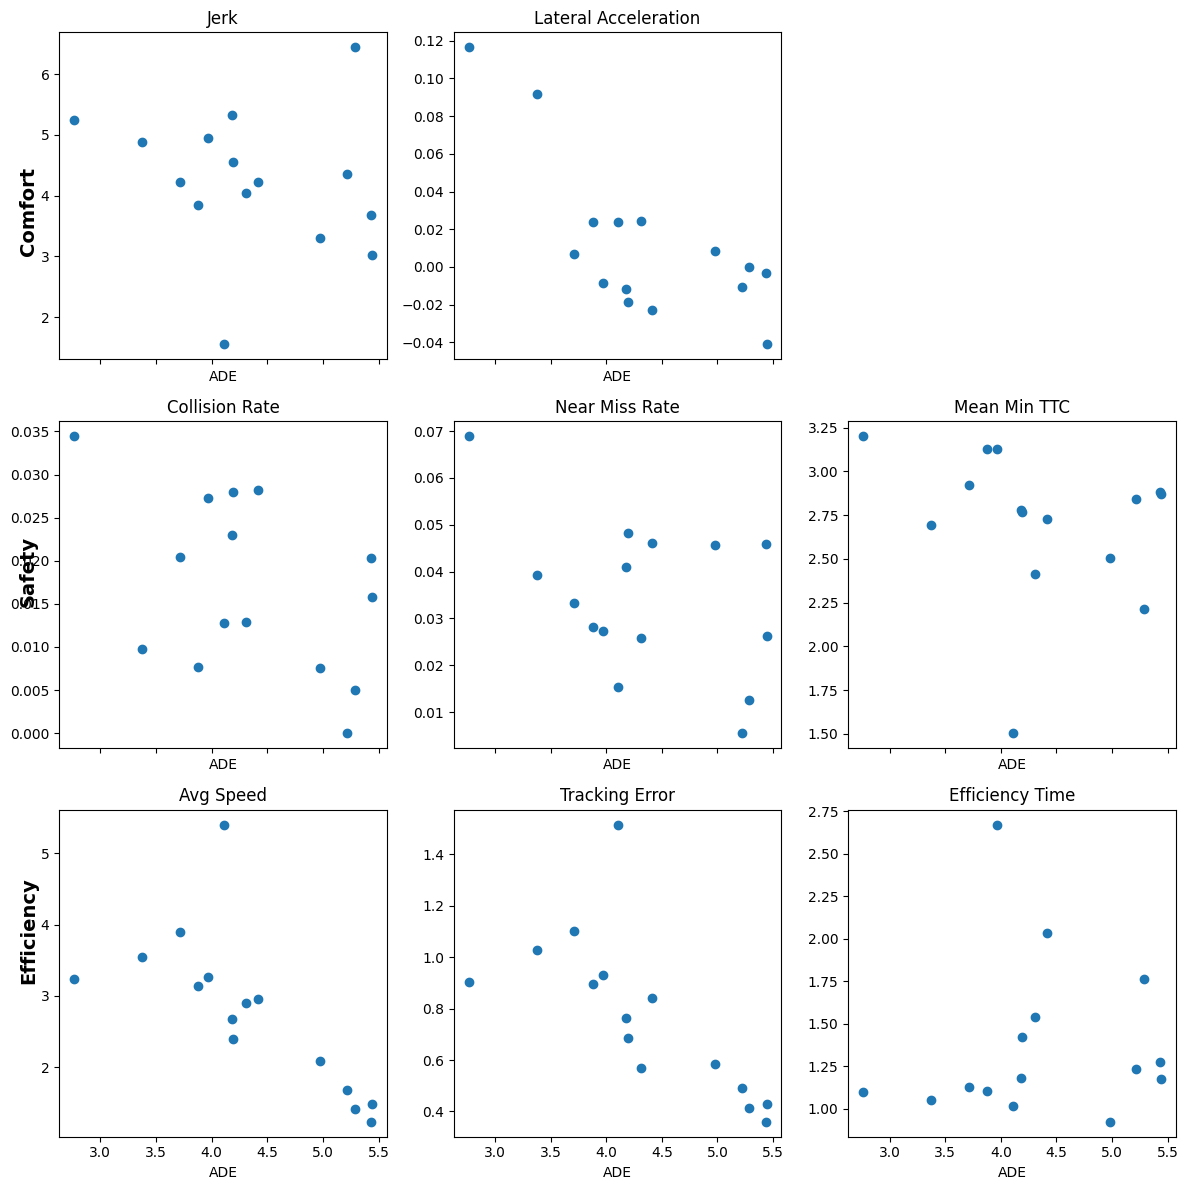

In [12]:
scatter_plot_one_pred_multi_metrics(prediction_performance['cv'], driving_performance['cv'])

In [ ]:
def scatter_plot_multi_pred_averaged_metrics(prediction_performance, driving_performance, methods_to_plot):  
    # Function to compute the weighted average
    def normalize(arr):
        if np.max(arr) - np.min(arr) == 0:
            return np.zeros_like(arr)
        return (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

    def weighted_average(data, weights, directions):
        norm_data = [normalize(arr) if direction == 'higher' else 1 - normalize(arr) for arr, direction in zip(data, directions)]
        return np.sum([w * d for w, d in zip(weights, norm_data)], axis=0)

    def plot_method(method, prediction_performance, driving_performance, row, axes):
        # Weights for each metric within a category
        safety_weights = {
            'collision_rate': 0.3,
            'near_miss_rate': 0.5,
            'mean_min_ttc': 0.2
        }
        safety_directions = {
            'collision_rate': 'lower',
            'near_miss_rate': 'lower',
            'mean_min_ttc': 'higher'
        }
        comfort_weights = {
            'jerk': 0.5,
            'lateral_acceleration': 0.5
        }
        comfort_directions = {
            'jerk': 'lower',
            'lateral_acceleration': 'lower'
        }
        efficiency_weights = {
            'avg_speed': 0.3,
            'tracking_error': 0.3,
            'efficiency_time': 0.2,
            'distance_traveled': 0.2
        }
        efficiency_directions = {
            'avg_speed': 'higher',
            'tracking_error': 'lower',
            'efficiency_time': 'lower',
            'distance_traveled': 'higher'
        }
        

        # Compute the weighted averages for each category
        safety_data = weighted_average(
            [driving_performance[method]['safety']['collision_rate'],
            driving_performance[method]['safety']['near_miss_rate'],
            driving_performance[method]['safety']['mean_min_ttc']],
            list(safety_weights.values()), list(safety_directions.values()))

        comfort_data = weighted_average(
            [driving_performance[method]['comfort']['jerk'],
            driving_performance[method]['comfort']['lateral_acceleration']],
            list(comfort_weights.values()), list(comfort_directions.values()))

        efficiency_data = weighted_average(
            [driving_performance[method]['efficiency']['avg_speed'],
            driving_performance[method]['efficiency']['tracking_error'],
            driving_performance[method]['efficiency']['efficiency_time'],
            driving_performance[method]['efficiency']['distance_traveled']],
            list(efficiency_weights.values()), list(efficiency_directions.values()))

        # Plot the scatter plots
        axes[row, 0].scatter(prediction_performance[method]['ade'], comfort_data)
        axes[row, 0].set_title(f'{method} - Comfort')
        axes[row, 0].set_xlabel('ADE')
        axes[row, 0].set_ylabel('Weighted Average')

        axes[row, 1].scatter(prediction_performance[method]['ade'], safety_data)
        axes[row, 1].set_title(f'{method} - Safety')
        axes[row, 1].set_xlabel('ADE')

        axes[row, 2].scatter(prediction_performance[method]['ade'], efficiency_data)
        axes[row, 2].set_title(f'{method} - Efficiency')
        axes[row, 2].set_xlabel('ADE')

    # List of methods to plot
    #methods_to_plot = ['method1', 'method2']

    fig, axes = plt.subplots(len(methods_to_plot), 3, figsize=(18, 6 * len(methods_to_plot)))

    for i, method in enumerate(methods_to_plot):
        plot_method(method, prediction_performance, driving_performance, i, axes)

    plt.tight_layout()
    plt.show()

scatter_plot_multi_pred_averaged_metrics(prediction_performance, driving_performance, ['cv'])